In [2]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

import tkinter as tk
from tkinter import filedialog

import opendatasets as od

In [3]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224,224,3))
def extract_features(image_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [4]:
extention = ['.jpg', '.jpeg', '.png', 'JPEG', 'JPG', 'PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extention):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list


In [6]:
od.download('https://www.kaggle.com/datasets/imbikramsaha/caltech-101')

100%|██████████| 131M/131M [00:42<00:00, 3.24MB/s] 


In [5]:

root_dir = r'C:\Users\ziado\Desktop\CSE480\Lab\caltech-101'
filenames = sorted(get_file_list(root_dir))

In [8]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))


C:\Users\ziado\AppData\Local\Temp\ipykernel_20732\4263576671.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(filenames))):


  0%|          | 0/9144 [00:00<?, ?it/s]

1/1 [==============================] - 1s 539ms/step


In [9]:
pickle.dump(feature_list, open(r'C:\Users\ziado\Desktop\CSE480\Lab\features.pickle', 'wb'))
pickle.dump(filenames, open(r'C:\Users\ziado\Desktop\CSE480\Lab\filenames.pickle', 'wb'))

In [6]:
feature_list= pickle.load(open(r'C:\Users\ziado\Desktop\CSE480\Lab\features.pickle', 'rb'))
filenames = pickle.load(open(r'C:\Users\ziado\Desktop\CSE480\Lab\filenames.pickle', 'rb'))

In [37]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10, algorithm='brute',
                             metric='euclidean').fit(feature_list) #unchanged
distances, indices = neighbors.kneighbors([feature_list[50]]) ##############################################################################################################query image

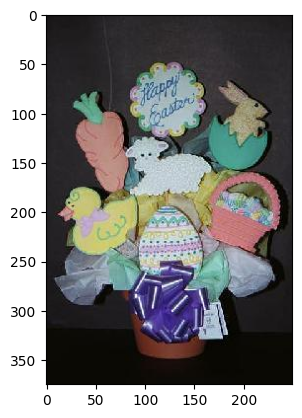

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 
plt.imshow(mpimg.imread(filenames[50]))

In [43]:
print(np.shape(indices))
print(filenames[indices[0][9]])
for i in range(10):
    print(distances[0][i])

(1, 10)
C:\Users\ziado\Desktop\CSE480\Lab\caltech-101\caltech-101\butterfly\image_0063.jpg
0.0
1.1501275945451144
1.161559774761477
1.1617302797177624
1.1663680829844765
1.1789960540077755
1.1795229260172027
1.18011396164889
1.181560923513003
1.1822722457209314


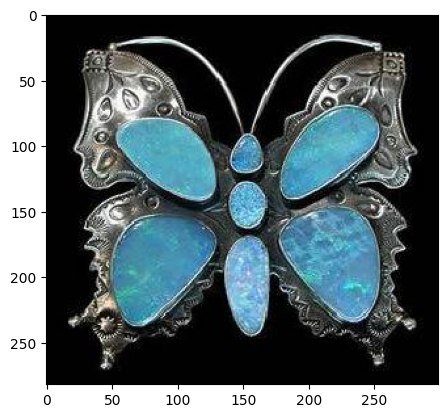

In [41]:
plt.imshow(mpimg.imread(filenames[indices[0][9]]))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.024s...
[t-SNE] Computed neighbors for 4000 samples in 0.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.146360
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.966820
[t-SNE] KL divergence after 1000 iterations: 0.995147


C:\Users\ziado\AppData\Local\Temp\ipykernel_20732\101661982.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('coolwarm')


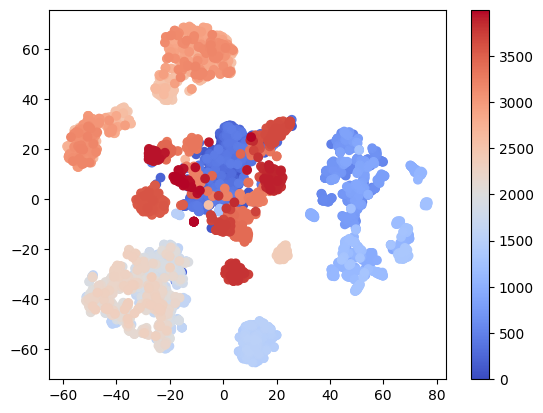

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Perform PCA over the features
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)

# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:4000]
selected_class_ids = np.arange(0,4000).tolist()
selected_filenames = filenames[:4000]

tsne_results =TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1], c=selected_class_ids, cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()